In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=sns.load_dataset("iris")
X = df.loc[:, ["petal_length", "sepal_length"]]
N= X.shape[0]
display(X)

,petal_length,sepal_length
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
...,...,...
145,5.2,6.7
146,5.0,6.3
147,5.2,6.5
148,5.4,6.2


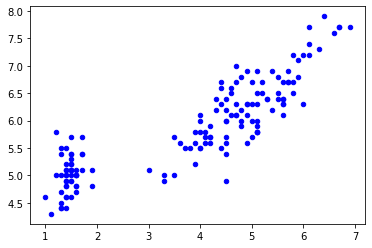

In [117]:
plt.scatter(X['petal_length'],X['sepal_length'],color='b',s=20)

In [111]:
#select centroids
k = int(input("enter K: "))
mu = X.sample(n=k)
mu

enter K: 4


,petal_length,sepal_length
32,1.5,5.2
129,5.8,7.2
67,4.1,5.8
100,6.0,6.3


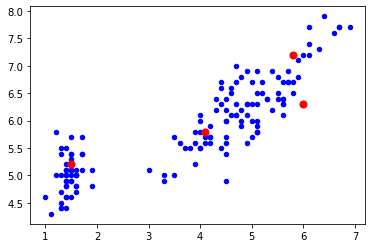

In [112]:
plt.scatter(X['petal_length'],X['sepal_length'],color="b",s=20)
plt.scatter(mu['petal_length'],mu['sepal_length'],color='r',s=50)

In [113]:
conv=1

while(conv!=0):
    data = X
    i=1
    
    #calculating euclidean distance for each instance for every mean
    for ind1,rmu in mu.iterrows():
        eudist=[] 
        for ind2,rx in data.iterrows():
            d1=(rmu["petal_length"]-rx['petal_length'])**2
            d2=(rmu["sepal_length"]-rx['sepal_length'])**2
            d=np.sqrt(d1+d2)
            eudist.append(d)
        X[i]=eudist
        i=i+1
    c=[]
    
    #finding minimum euclidean distance in each instance between means
    for ind,row in X.iterrows():
        mindist=row[1]
        pos=1
        for i in range(k):
            if row[i+1]<mindist:
                mindist=row[i+1]
                pos=i+1
        c.append(pos)
    
    # assign cluster
    X["cluster"]=c
    
    # find new mean for each cluster
    newmu=X.groupby(["cluster"]).mean()[["petal_length",'sepal_length']]
    mu=mu[["petal_length","sepal_length"]]
    
    # check convergence criterion
    if newmu.equals(mu):
        conv = 0
        print("Final centroids:\n")
        display(newmu)
    else:
        display(newmu)
        mu=newmu
        continue

,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,5.800000,7.165217
3,4.332143,5.850000
4,5.457143,6.371429


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.150000,7.312500
3,4.227083,5.808333
4,5.258333,6.400000


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.228571,7.385714
3,4.167442,5.755814
4,5.213953,6.402326


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.269231,7.423077
3,4.100000,5.664865
4,5.148000,6.402000


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.269231,7.423077
3,4.065714,5.645714
4,5.130769,6.386538


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.269231,7.423077
3,4.027273,5.630303
4,5.114815,6.368519


,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.228571,7.385714
3,4.006452,5.583871
4,5.076364,6.358182


Final centroids:



,petal_length,sepal_length
cluster,,
1,1.462000,5.006000
2,6.228571,7.385714
3,4.006452,5.583871
4,5.076364,6.358182


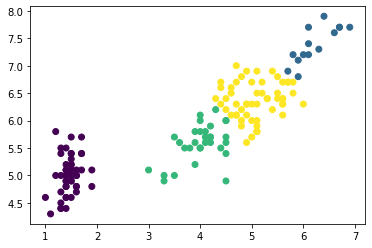

In [114]:
plt.scatter(X["petal_length"], X['sepal_length'], c=X["cluster"])